# Data Analysis (EDA) on the Titanic Dataset

**Project Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization, with theoretical explanations at each stage.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

### Data Loading and Initial Inspection

In [48]:
df = pd.read_csv('21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [49]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Interpretation of `.info()`:**
- The dataset contains 891 entries (passengers) and 12 columns.
- **Missing Values Identified:** `Age`, `Cabin`, and `Embarked` have missing values. `Cabin` is missing a significant amount of data (~77%), which will require special attention.

In [ ]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Interpretation of `.describe()`:**
- **Survived:** About 38.4% of passengers in this dataset survived.
- **Age:** The age ranges from ~5 months to 80 years, with an average age of about 30.
- **Fare:** The fare is highly skewed, with a mean of $32 but a median of only $14.45. The maximum fare is over $512, indicating the presence of extreme outliers.

In [ ]:
print(len(df[df["Age"] >= 18]))

df[df["Age"] >= 18]

601


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
885      5            382652  29.1250   NaN        Q  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[601 rows x 12 columns]

In [ ]:
df[df["Embarked"] == 'C'] 

PassengerId  Survived  Pclass  \
1              2         1       1   
9             10         1       2   
19            20         1       3   
26            27         0       3   
30            31         0       1   
..           ...       ...     ...   
866          867         1       2   
874          875         1       2   
875          876         1       3   
879          880         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN      0   
26                             Emir, Mr. Farred Chehab    male   NaN      0   
30                            Uruchurtu, Don. Manuel E    male  40.0      0   
..                                                 ...     ...   ...    ...   
866                       Duran y More, Miss. Asuncion  female  27.0      1   
874              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0      1   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch         Ticket     Fare Cabin Embarked  
1        0       PC 17599  71.2833   C85        C  
9        0         237736  30.0708   NaN        C  
19       0           2649   7.2250   NaN        C  
26       0           2631   7.2250   NaN        C  
30       0       PC 17601  27.7208   NaN        C  
..     ...            ...      ...   ...      ...  
866      0  SC/PARIS 2149  13.8583   NaN        C  
874      0      P/PP 3381  24.0000   NaN        C  
875      0           2667   7.2250   NaN        C  
879      1          11767  83.1583   C50        C  
889      0         111369  30.0000  C148        C  

[168 rows x 12 columns]

In [ ]:
df[(df["Sex"] == 'female') & (df['Embarked'] == 'Q')]

PassengerId  Survived  Pclass  \
22            23         1       3   
28            29         1       3   
32            33         1       3   
44            45         1       3   
47            48         1       3   
82            83         1       3   
109          110         1       3   
156          157         1       3   
186          187         1       3   
198          199         1       3   
208          209         1       3   
241          242         1       3   
264          265         0       3   
274          275         1       3   
289          290         1       3   
300          301         1       3   
303          304         1       2   
322          323         1       2   
330          331         1       3   
358          359         1       3   
359          360         1       3   
368          369         1       3   
412          413         1       1   
501          502         0       3   
502          503         0       3   
573          574         1       3   
593          594         0       3   
612          613         1       3   
653          654         1       3   
654          655         0       3   
657          658         0       3   
680          681         0       3   
697          698         1       3   
727          728         1       3   
767          768         0       3   
885          886         0       3   

                                                Name     Sex   Age  SibSp  \
22                       McGowan, Miss. Anna "Annie"  female  15.0      0   
28                     O'Dwyer, Miss. Ellen "Nellie"  female   NaN      0   
32                          Glynn, Miss. Mary Agatha  female   NaN      0   
44                     Devaney, Miss. Margaret Delia  female  19.0      0   
47                         O'Driscoll, Miss. Bridget  female   NaN      0   
82                    McDermott, Miss. Brigdet Delia  female   NaN      0   
109                              Moran, Miss. Bertha  female   NaN      1   
156                 Gilnagh, Miss. Katherine "Katie"  female  16.0      0   
186  O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)  female   NaN      1   
198                 Madigan, Miss. Margaret "Maggie"  female   NaN      0   
208                        Carr, Miss. Helen "Ellen"  female  16.0      0   
241                   Murphy, Miss. Katherine "Kate"  female   NaN      1   
264                               Henry, Miss. Delia  female   NaN      0   
274                       Healy, Miss. Hanora "Nora"  female   NaN      0   
289                             Connolly, Miss. Kate  female  22.0      0   
300         Kelly, Miss. Anna Katherine "Annie Kate"  female   NaN      0   
303                              Keane, Miss. Nora A  female   NaN      0   
322                        Slayter, Miss. Hilda Mary  female  30.0      0   
330                               McCoy, Miss. Agnes  female   NaN      2   
358                             McGovern, Miss. Mary  female   NaN      0   
359                Mockler, Miss. Helen Mary "Ellie"  female   NaN      0   
368                              Jermyn, Miss. Annie  female   NaN      0   
412                           Minahan, Miss. Daisy E  female  33.0      1   
501                              Canavan, Miss. Mary  female  21.0      0   
502                   O'Sullivan, Miss. Bridget Mary  female   NaN      0   
573                                Kelly, Miss. Mary  female   NaN      0   
593                               Bourke, Miss. Mary  female   NaN      0   
612                      Murphy, Miss. Margaret Jane  female   NaN      1   
653                    O'Leary, Miss. Hanora "Norah"  female   NaN      0   
654                     Hegarty, Miss. Hanora "Nora"  female  18.0      0   
657                    Bourke, Mrs. John (Catherine)  female  32.0      1   
680                              Peters, Miss. Katie  female   NaN      0   
697                 Mullens, Miss. Katherine "Katie"  fem

In [ ]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

###  Data Cleaning

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
median_age = df["Age"].median()
median_age

28.0

In [ ]:
df["Age"] = df["Age"].fillna(median_age)

In [59]:
mode_embarked = df["Embarked"].mode()[0]
mode_embarked

'S'

In [ ]:
df["Embarked"] = df["Embarked"].fillna(mode_embarked)

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['hasCabin'] = df['Cabin'].notna().astype(int) 
df.drop('Cabin', axis=1, inplace=True)

In [63]:
df['hasCabin'].value_counts()

hasCabin
0    687
1    204
Name: count, dtype: int64

In [ ]:
df['Name'].duplicated().sum()

0

In [65]:
df.isnull().sum() # no null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
hasCabin       0
dtype: int64

### Univariate Analysis

We analyze each variable individually to understand its distribution.

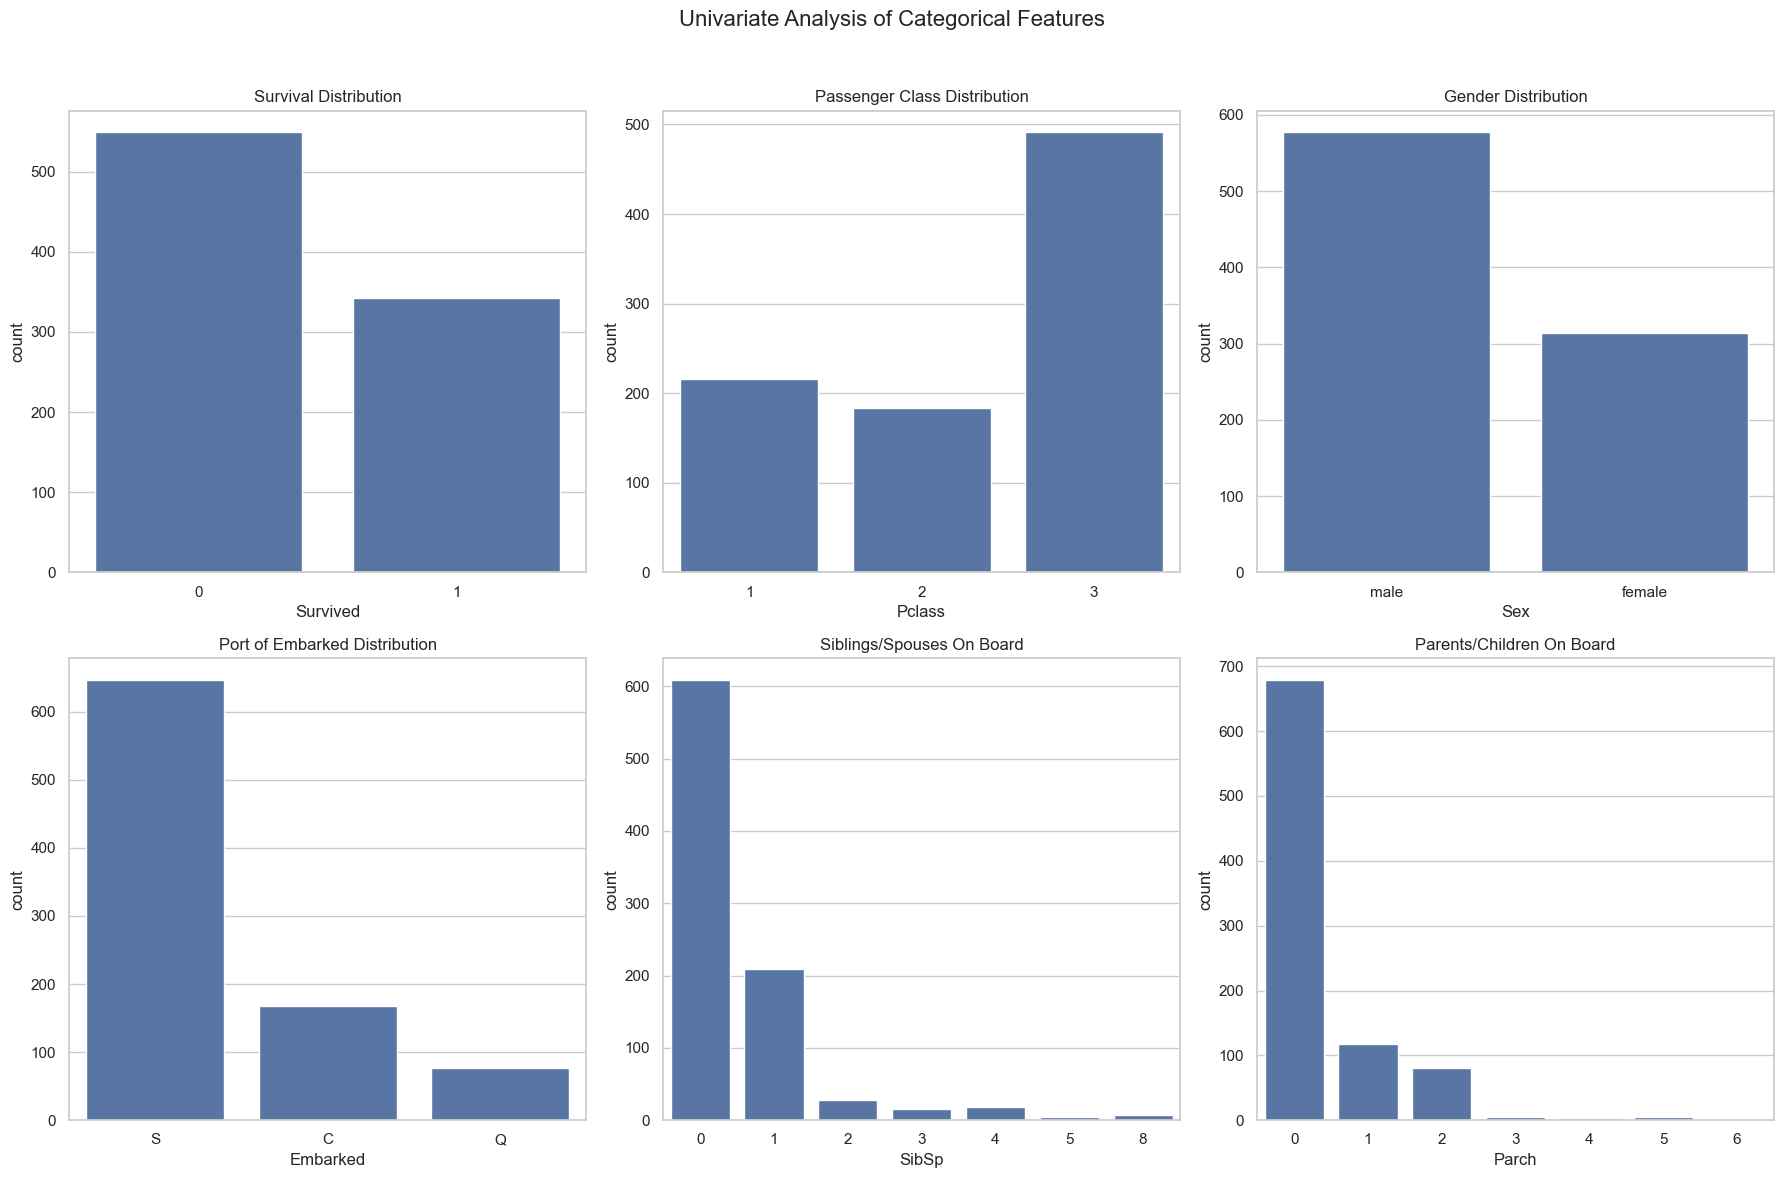

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarked Distribution')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses On Board')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children On Board')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.


Analyzing numerical features:


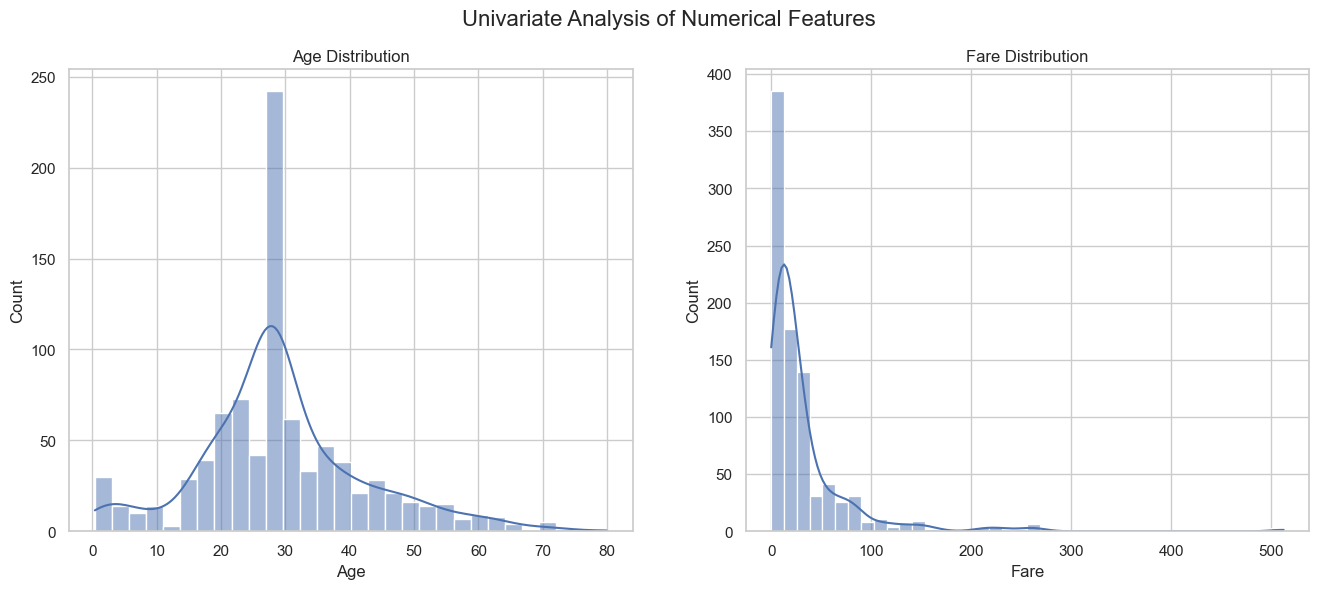

In [68]:
print("\nAnalyzing numerical features:")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Univariate Analysis of Numerical Features", fontsize=16)

sns.histplot(ax=axes[0], data=df, x="Age", kde=True, bins=30).set_title("Age Distribution")
sns.histplot(ax=axes[1], data=df, x="Fare", kde=True, bins=40).set_title("Fare Distribution")

plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

### Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, `Survived`.

Bivariate Analysis: Feature vs Survival


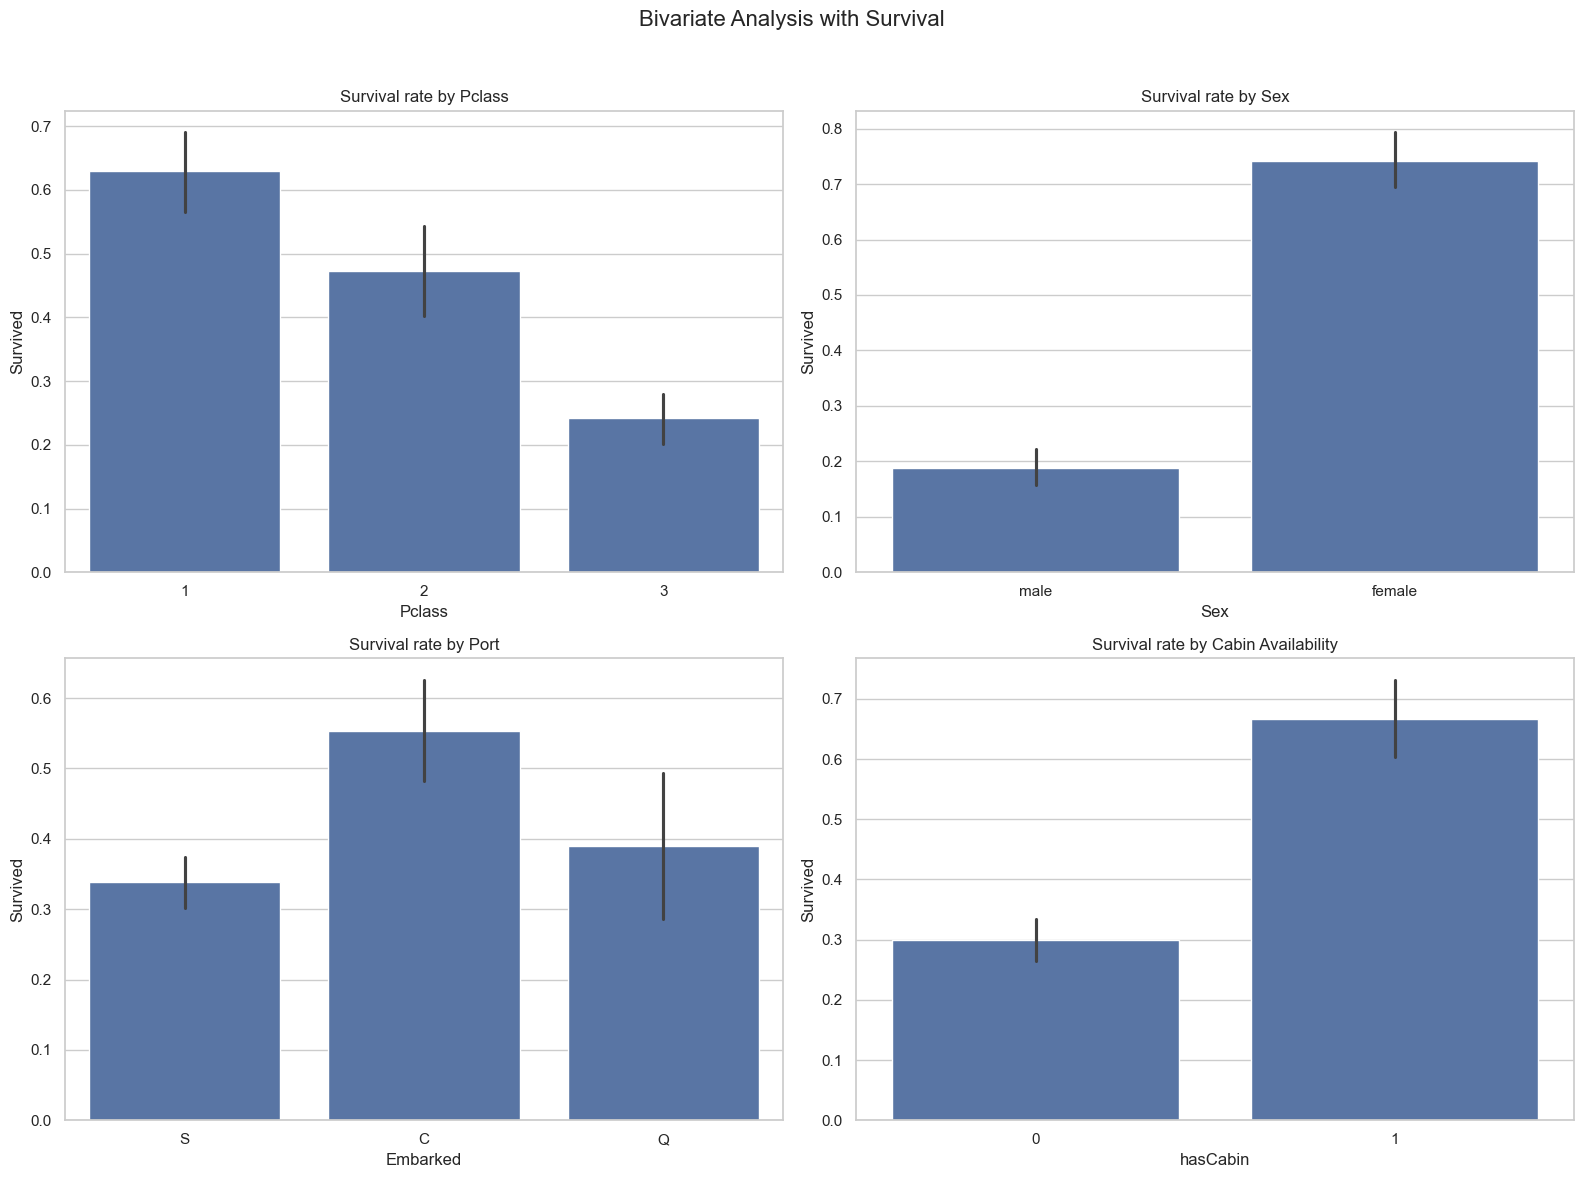

In [69]:
print("Bivariate Analysis: Feature vs Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Bivariate Analysis with Survival", fontsize=16)

# Pclass vs Survived
sns.barplot(ax=axes[0, 0], x="Pclass", y="Survived", data=df).set_title("Survival rate by Pclass")

# Sex vs Survived
sns.barplot(ax=axes[0, 1], x="Sex", y="Survived", data=df).set_title("Survival rate by Sex")

# Embarked vs Survived
sns.barplot(ax=axes[1, 0], x="Embarked", y="Survived", data=df).set_title("Survival rate by Port")

# hasCabin vs Survived
sns.barplot(ax=axes[1, 1], x="hasCabin", y="Survived", data=df).set_title("Survival rate by Cabin Availability")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

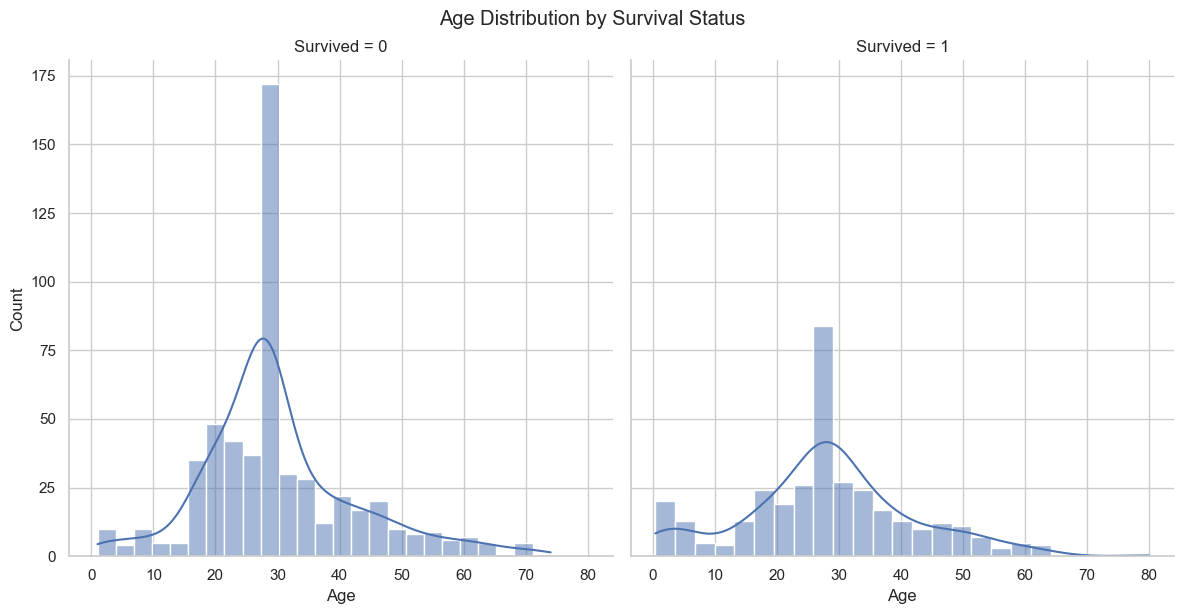

In [70]:
# Age vs Survival
g = sns.FacetGrid(df, col="Survived", height=6)
g.map(sns.histplot, "Age", bins=25, kde=True)
plt.suptitle("Age Distribution by Survival Status", y=1.02)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

#### Deeper Dive: Outlier Analysis for 'Fare'
The `.describe()` function and histogram showed that `Fare` has extreme outliers. Let's visualize this clearly with a box plot.

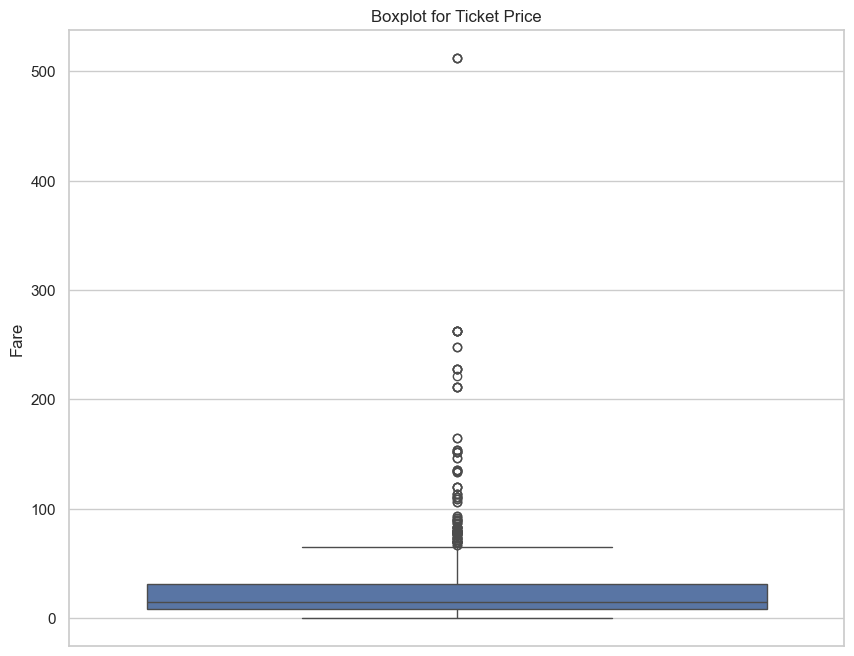

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(y="Fare", data=df)
plt.title("Boxplot for Ticket Price")
plt.ylabel("Fare")
plt.show()

This shows that the acceptable values are between the black lines and the majority of the values for `Fare` in the dataset is around the blue rectangle. Everything above and below the black lines are `outliers` marked with circles!

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

### Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.

In [ ]:
## Create a "familySize" column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


## Creating a "IsAlone" Feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, "IsAlone"] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', "IsAlone"]].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

In [74]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  hasCabin  FamilySize  IsAlone  
0        0         A/5 21171   7.2500        S         0           2        0  
1        0          PC 17599  71.2833        C         1           2        0  
2        0  STON/O2. 3101282   7.9250        S         0           1        1  
3        0            113803  53.1000        S         1           2        0  
4        0            373450   8.0500        S         0           1        1  
..     ...               ...      ...      ...       ...         ...      ...  
886      0            211536  13.0000        S         0           1        1  
887      0            112053  30.0000        S         1           1        1  
888      2        W./C. 6607  23.4500        S         0           4        0  
889      0            111369  30.0000        C         1           1        1  
890      0            370376   7.7500        Q         0           1        1  

[891 rows x 14 columns]

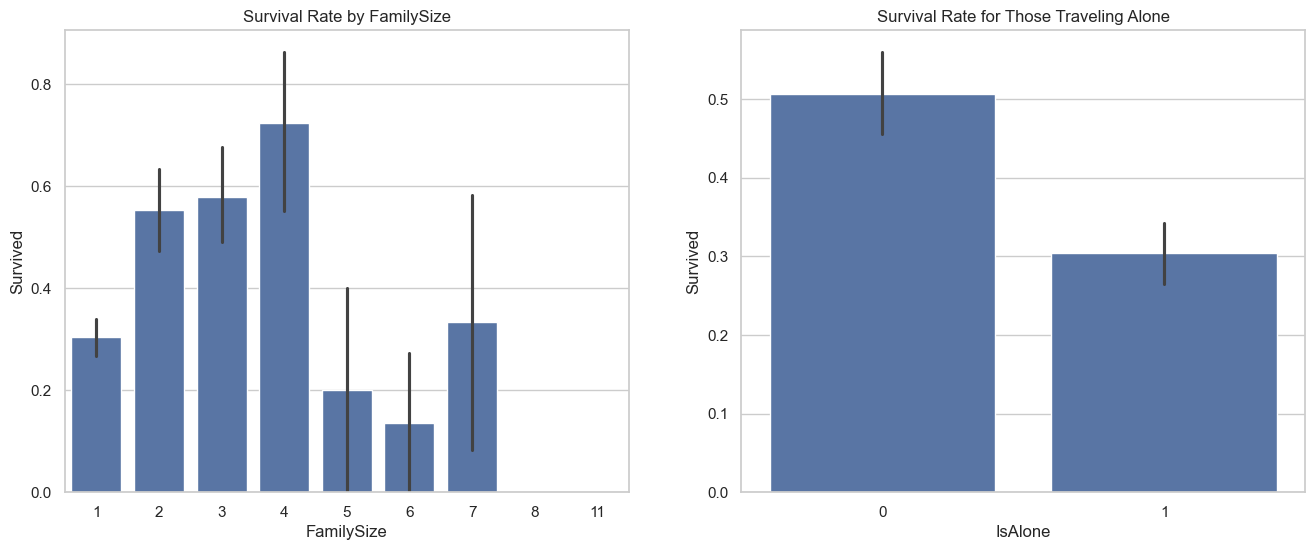

In [75]:
# Analyze the new family-related feature against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x="FamilySize", y="Survived", data=df).set_title("Survival Rate by FamilySize")

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x="IsAlone", y="Survived", data=df).set_title("Survival Rate for Those Traveling Alone")

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [76]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Lets see the different titles
print("Extracted Titles")
pd.DataFrame(df['Title'].value_counts())

Extracted Titles


count
Title          
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1

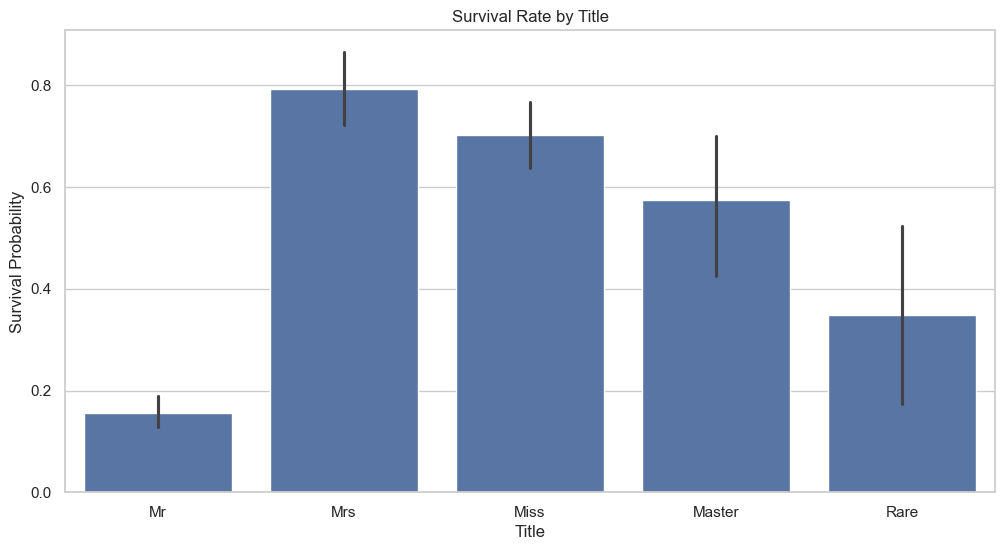

In [77]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

### Multivariate Analysis

Now we explore interactions between multiple variables simultaneously, including our new engineered features.

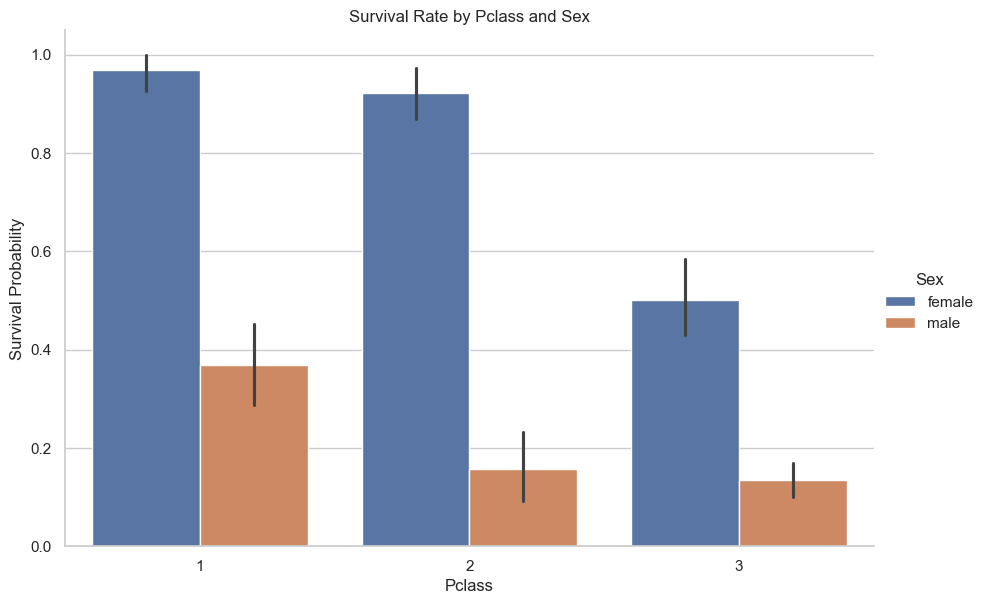

In [ ]:
# Survival rate by Pclass and Sex
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df, kind="bar", height=6, aspect=1.5)
plt.title("Survival Rate by Pclass and Sex")
plt.ylabel("Survival Probability")
plt.show()

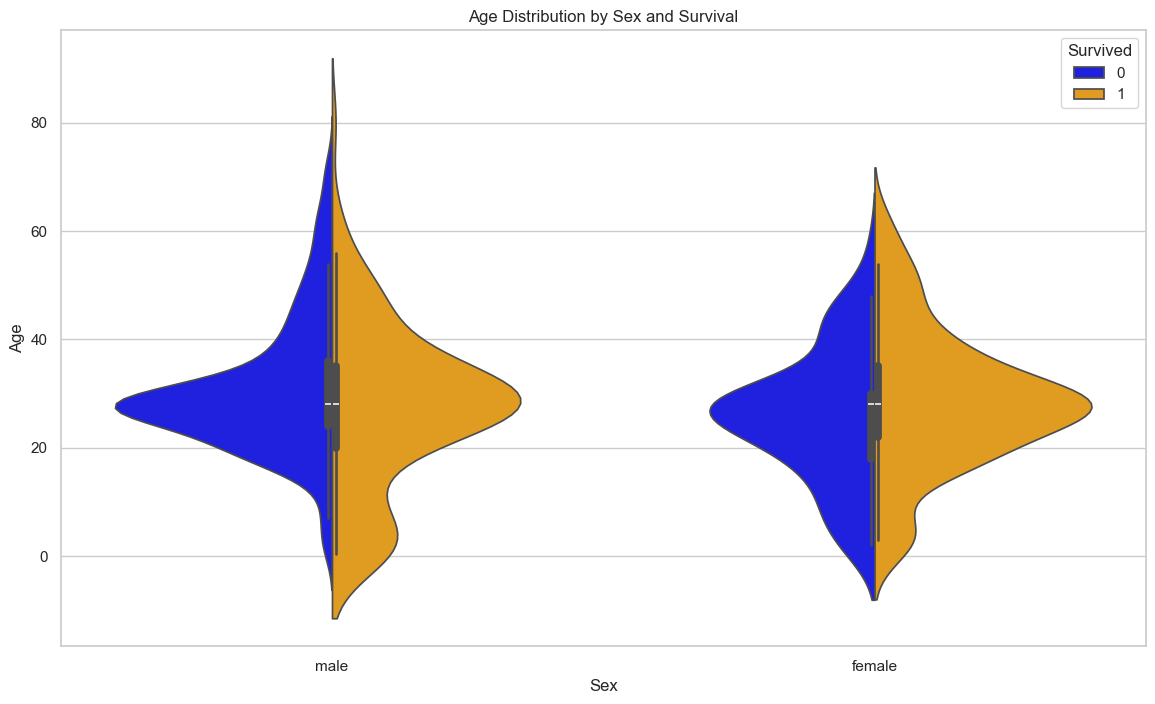

In [79]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title("Age Distribution by Sex and Survival")
plt.show()


**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

### Correlation Analysis

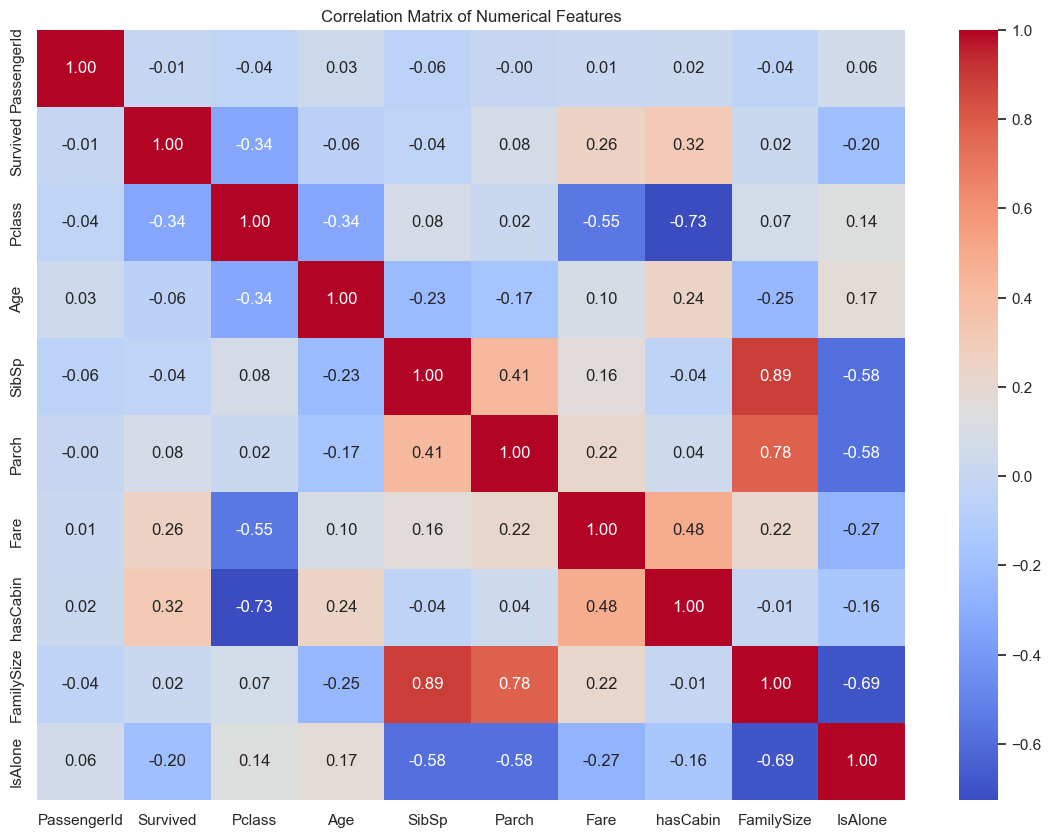

In [ ]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

### Final Conclusion and Summary of Insights

My analysis confirms the "women and children first" narrative and highlights the stark social inequalities of the time. Through feature engineering, we've created even more powerful predictors for a potential machine learning model.

**Key Findings:**
1.  **Strongest Predictors of Survival:**
    - **Title & Sex:** Being female ('Mrs', 'Miss') was the single most significant advantage. Our engineered `Title` feature captures this nuance better than `Sex` alone, also showing that young boys ('Master') had a much higher survival rate than adult men ('Mr').
    - **Passenger Class:** There was a clear survival hierarchy: 1st > 2nd > 3rd class.
    - **Age:** Children and infants had a higher survival rate.

2.  **Other Influential Factors:**
    - **Family Size:** Traveling in a small family (2-4 members) increased survival chances, while traveling alone or in a very large family decreased them.
    - **Fare/Cabin:** Having a cabin (and thus paying a higher fare) was strongly correlated with survival, acting as a proxy for wealth and passenger class.
    - **Port of Embarkation:** Passengers from Cherbourg ('C') had a higher survival rate, possibly because a higher proportion of them were in 1st class.

These insights are fundamental for the next step in the data science pipeline: building a predictive machine learning model to forecast survival.

In [81]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 454.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("Titanic EDA.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]